# TALLER SISTEMAS DIFUSOS CON SCIKIT FUZZY

Nota: Para realizar este ejercicio debe tenerse instalada la libreria scikit-fuzzy, así como la libreria matplotlib para propósitos de visualización.


RECURSOS:

- https://www.cs.cas.cz/cintula/MFL.html
- https://www.monografias.com/trabajos106/introduccion-logica-difusa-variables-linguisticas-y-logica-difusa/introduccion-logica-difusa-variables-linguisticas-y-logica-difusa.shtml 


# REFRESCANDO CONCEPTOS: CASO -> PROPINAS PARA DOMICILIARIOS DE RAPPI

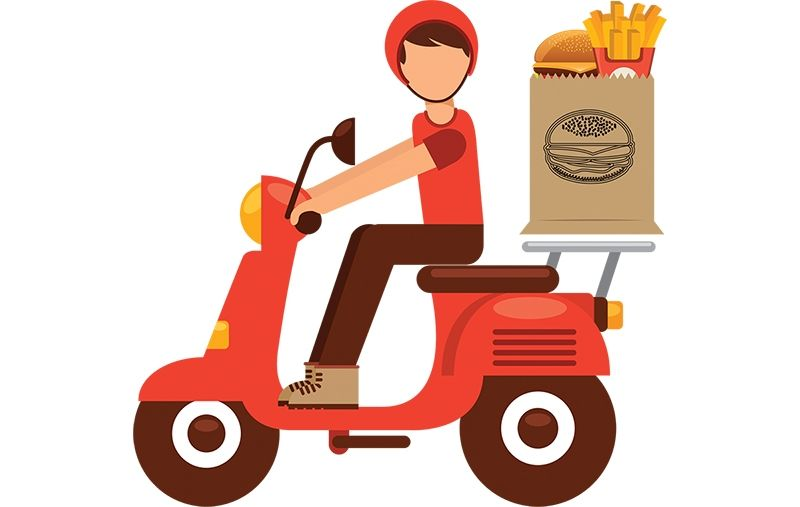!

Cuando trabajamos con sistemas difusos es necesario tener en cuenta que se trata de una metodología basada en que el valor de verdad de algo se puede expresar como una cantidad continua, es decir, que no hay valores de verdadero o falso absolutos sino de parcialmente verdadero o parcialmente falso.


### VARIABLES NUMÉRICAS

Una variable difusa puede tomar valores numéricos pertenecientes a un dominio (o en términos de lógica difusa, un universo). El valor numérico es muy parecido a lo que podemos pensar de una variable usando matemáticas normales. Por ejemplo: si nuestra variable difusa es la propina que le vamos a dar a un domiciliario de Rappi, su universo podría ser entre 0 y 6000 pesos y un valor numérico que puede tomar es 2500 pesos.

### VARIABLES LINGÜÍSTICAS

Una variable difusa también tiene varios términos que pueden ser usados para describirla. Estos términos, también conocidos como variables lingüísticas, forman el conjunto difuso que puede ser usado para describir el "valor difuso" de una variable difusa. Esos términos son a mendo adjetivos como "pobre", "mediocre", y "bueno". Cada término tiene una función de membresía que determina como un valor numérico se mapea al término en una escala de 0 a 1. En esencia, describe "qué tan bueno" es algo.


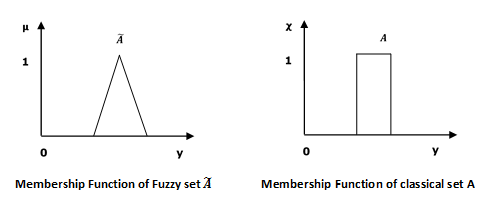

## SISTEMAS DE CONTROL DIFUSOS

Un sistema de control difuso conecta variables difusa usando un conjunto de reglas. Estas reglas son simplemente mapeos que describen como se relacionan una o más variables difusas con las demás. Estas se expresan en forma de instrucciónes SI-ENTONCES; la parte SI es llamada el **antecedente** y la parte ENTONCES es la **consecuencia**. En nuestro caso, una regla podría ser "SI la entrega se demoró mucho, ENTONCES la propina será buena". 

La matemática exacta de como se usa una regla para calcular el valor de la consecuencia basada en el antecedente está fuera del alcance de este ejercicio, pues la librería Scikit Fuzzy se encarga de ello "por debajo".
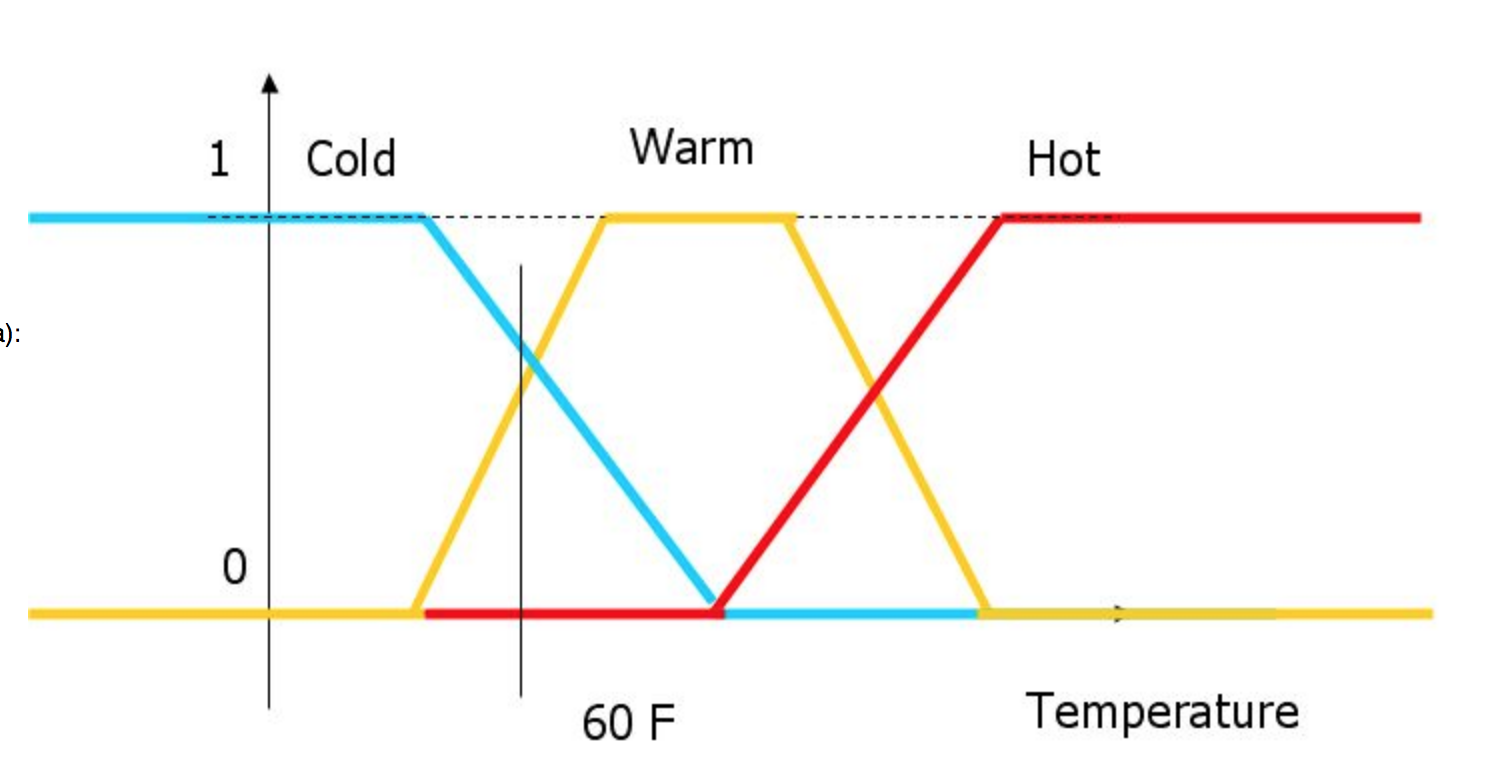

# DEFINICIÓN DEL PROBLEMA -> EL CASO DE LA PROPINA

Volviendo al ejemplo de las propinas, una "propina buena" podría tener una función de membresía que tiene valores no negativos entre 2500 y 6000, siendo 6000 una "propina totalmente buena" (es decir, de membresía 1.0) y 2500 una "propina a duras penas buena" (es decir, su membresía es 0.1).

Las reglas de nuestro sistema difuso son las siguientes:



### ANTECEDENTES

- Velocidad del servicio:
        Universo: ¿Cuántos minutos de diferencia hubo entre la entrega hora de entrega esperada y la real? (Escala de -60 minutos a 60 minutos)
        Conjunto difuso: Más rápida de lo esperado, dentro de lo esperado, mucho después de lo esperado.

- Calidad del embalaje/servicio:
        Universo: ¿En qué estado se hizo entrega de la comida? (Escala de 1 a 10)
        Conjunto difuso: Comida regada, Embalaje dañado, Perfecto estado.

### CONSECUENCIAS (SALIDAS)

- Propina:
        Universo: ¿Cuánta propina debería darle al domiciliario? (Escala de 0 a 6000)
        Conjunto difuso: Poca, Media, Mucha.



# EJERCICIO CON SCIKIT FUZZY


## 0. IMPORTANDO LIBRERÍAS

In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #para quitar una advertencia de las gráficas

## 1. DEFINICIÓN DE UNIVERSOS

In [31]:
# Generar los universos de las variables.
# Rapidez del servicio entre -60 y 60 minutos menos o más respecto a lo esperado.
# 
# 


rapidez = ctrl.Antecedent(np.arange(-60, 61, 1), 'Rapidez')  #Creamos una instancia de la clase Antecedent, con valores de -60 a 60 e incrementos de 1.
                                                  #Note cómo se le añade una unidad al extremo derecho del intervalo, ya que es semiabierto [).
embalaje =          #   INSERTE AQUÍ EL UNIVERSO DE VALORES PARA EL EMBALAJE
propina =       # INSERTE AQUÍ EL UNIVERSO PARA LA PROPINA (NOTA: ¿Tiene sentido usar incrmeentos de 1 a 1 para la propina?)


## 2. FUNCIONES DE MEMBRESÍA

Generaremos las funciones de membresía con la función trimf, la cual recibe como primer argumento el universo que definimos como un rango de valores arriba y como segundo argumento recibe una lista de tres valores a <= b <= c donde a y c son los límites de la función de membresía y b es su punto más alto. En este caso, tanto para la categoría de rapidez baja como la de rapidez alta tendremos que el punto más alto será el extremo, mientras que para la rapidez media será el punto medio (0).


A continuación el código para la función de membresía para RAPIDEZ:

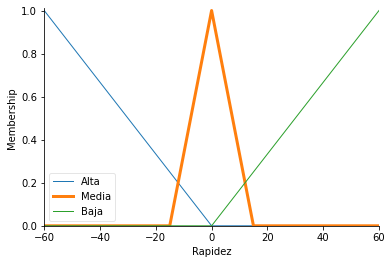

In [36]:
# FUNCIONES DE MEMBRESÍA PARA LA FUNCIÓN DE RAPIDEZ

rapidez['Alta'] = fuzz.trimf(rapidez.universe, [-60, -60, 0])
rapidez['Media'] = fuzz.trimf(rapidez.universe, [-15, 0, 15])
rapidez['Baja'] = fuzz.trimf(rapidez.universe, [0, 60, 60])

rapidez['Media'].view()



Ahora usted debe definir las funciones de membresía para el embalaje y la propina, se relacionan las gráficas esperadas (no tienen que ser exactamente iguales)

In [40]:
embalaje['Comida_regada'] =     #SU CÓDIGO AQU
embalaje['Embalaje_dañado'] =   #SU CÓDIGO AQU
embalaje['Perfecto_estado'] =   #SU CÓDIGO AQU

propina['Poca'] =              #SU CÓDIGO AQU
propina['Media'] =       #SU CÓDIGO AQU
propina['Mucha'] =     #SU CÓDIGO AQU

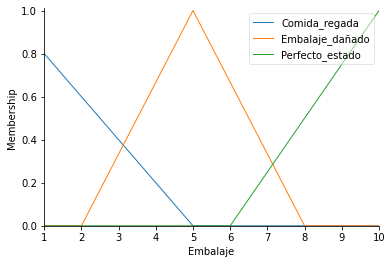

In [38]:
embalaje.view()

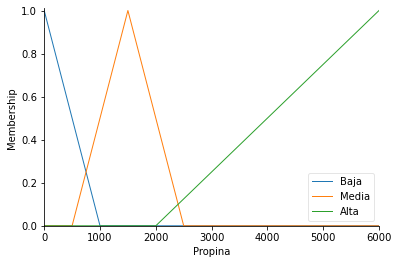

In [39]:
propina.view()

Ahora, para hacer que estos triángulos sean útiles, debemos definir la relación difusa entre las variables de entrada y las de salida.


### REGLAS

        Si el servicio fue rápido o dentro de lo esperado, y la comida estaba en perfecto estado, ENTONCES la propina será alta.
        Si el embalaje de la comida estaba en mal estado, la propina será media.
        Si el servicio fue lento o la comida estaba regada, la propina será baja.


La mayoría de nosotros estaría de acuerdo con estas reglas, pero son reglas difusas. Sin embargo, mapear estas reglas imprecisas en una propina no es tan fácil, y es una tarea a la que la lógica difusa se adecúa bastante.

Aquí se utilizan los siguientes operadores:

~ : NOT

& : AND

| : OR

Y se pueden agrupar reglas con paréntesis.

In [43]:
rule1 = ctrl.Rule( (rapidez['Alta'] | rapidez['Media']) & embalaje['Perfecto_estado'], propina['Mucha'])
rule2 =      #SU CÓDIGO AQUÍ
rule3 =      #SU CÓDIGO AQUÍ

# SISTEMA DE CONTROL

Para crear el sistema de control difuso, usamos la clase ControlSystem, la cual recibe como entrada una lista de python con las reglas del sistema. Luego, ese controlador se le pasa a un objeto ControlSystemSimulation que es el que recibe las entradas.

In [49]:
ctrl_propinas = #SU CÓDIGO AQUÍ
sim_propinas = ctrl.ControlSystemSimulation(ctrl_propinas)

# INGRESANDO DATOS Y COMPUTANDO

A continuación, mostramos el resultado de una calidad de 5 en el Embalaje y una rapidez media.

In [52]:
sim_propinas.input['Embalaje'] = 5
sim_propinas.input['Rapidez'] = 0

# Crunch the numbers
sim_propinas.compute()

La propina es de 1500 pesos


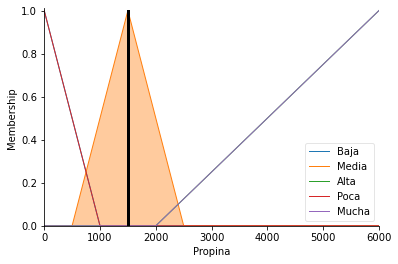

In [56]:
print("La propina es de", int(sim_propinas.output['Propina']), "pesos")
propina.view(sim=sim_propinas)

# Como vemos, el resultado de un embalaje dañado pero sin que la comida esté regada y una entrega en tiempo normal resulta en una propina estándar.

Nota: Este ejercicio fue adaptado de la documentación de la nueva API de Scikit Fuzzy. Anteriormente, la API era bastante más compleja, aunque al revisarla se puede entender más de cómo funcionan estos ejercicios por debajo.

NUEVA API: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html
ANTIGUA API: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html